# Machine Learning Model 1 — Multinomial Naive Bayes

### Why this model?
Multinomial Naive Bayes is widely used for text classification because:
- It works well with sparse TF-IDF features
- It is fast to train
- It performs strongly on bag-of-words style NLP tasks

### Formula (Bayes' Theorem)
\[
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
\]

Where:
- \(P(y|x)\): probability of class given text  
- \(P(x|y)\): likelihood  
- \(P(y)\): prior probability of class  

### Goal
Predict whether a review is **positive** or **negative** using Naive Bayes.


In [1]:
# ============================
# 📌 Import libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


In [2]:
# ============================
# 📌 Load dataset
# ============================
df = pd.read_csv("zomato_reviews.csv")

# Show sample records
df.head()


,review_id,rating,review_text,review_date,helpful
0,90749778-cd88-4c19-8b12-1fce7e7d82f8,4,kindly requesting to return change . we are fo...,11/27/2025 8:15,0
1,aa848bb6-d242-4a7e-831e-4f21e2e60c6e,1,"Hiked prices, packing and platform charges",11/27/2025 8:08,0
2,4f888388-9f28-44a4-8601-491a87035e53,5,good discount,11/27/2025 4:20,0
3,490a16b3-aacf-4204-bdcb-ffdbf04add72,1,"Zomato in its initial days was too good, but c...",11/27/2025 3:34,0
4,0090a503-13b8-4741-a7c0-42e811244563,5,good application,11/27/2025 2:50,0


In [3]:
# ============================
# 📌 Convert ratings → sentiment labels
# ============================
df["sentiment"] = df["rating"].apply(lambda x: 1 if x >= 3 else 0)
df["sentiment"].value_counts()


sentiment
1    14526
0     5474
Name: count, dtype: int64

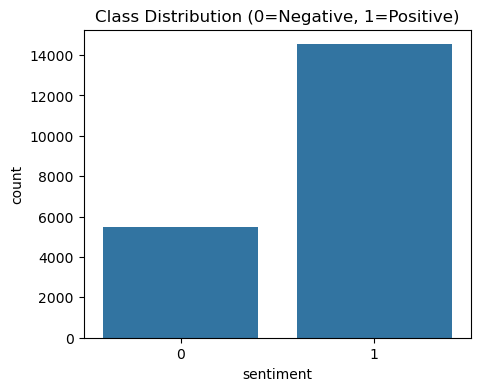

In [4]:
# ============================
# 📌 Plot class distribution
# ============================
plt.figure(figsize=(5,4))
sns.countplot(x=df["sentiment"])
plt.title("Class Distribution (0=Negative, 1=Positive)")
plt.show()


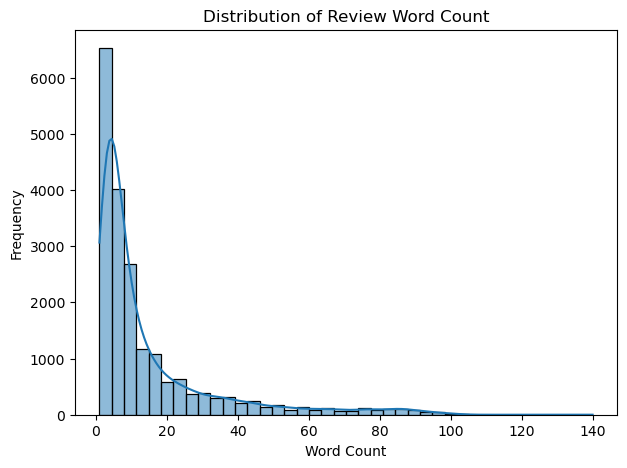

In [15]:
# ============================
# 📌 Word Count Feature
# ============================
df["word_count"] = df["review_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(7,5))
sns.histplot(df["word_count"], bins=40, kde=True)
plt.title("Distribution of Review Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


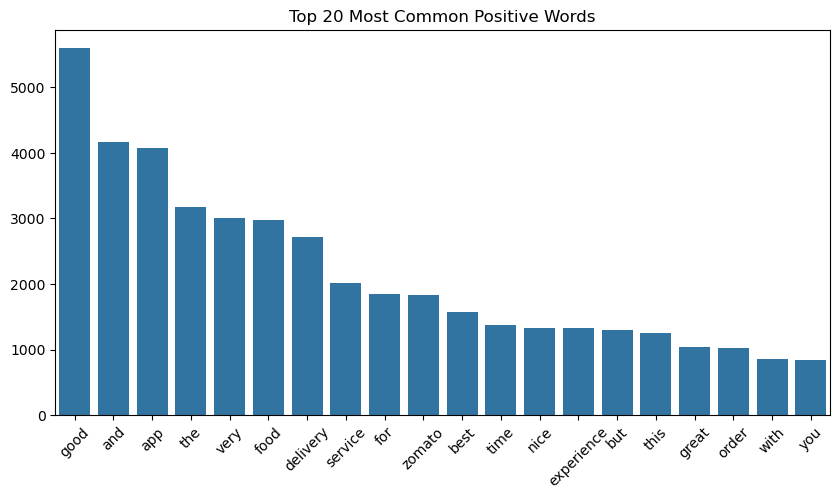

In [16]:
# ============================
# 📌 Common Positive Words
# ============================
from collections import Counter
import re

# Filter positive reviews
positive_reviews = df[df["sentiment"] == 1]["review_text"]

# Tokenize
words = " ".join(positive_reviews).lower()
words = re.findall(r'\b[a-zA-Z]{3,}\b', words)

common_pos = Counter(words).most_common(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in common_pos], y=[w[1] for w in common_pos])
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Positive Words")
plt.show()


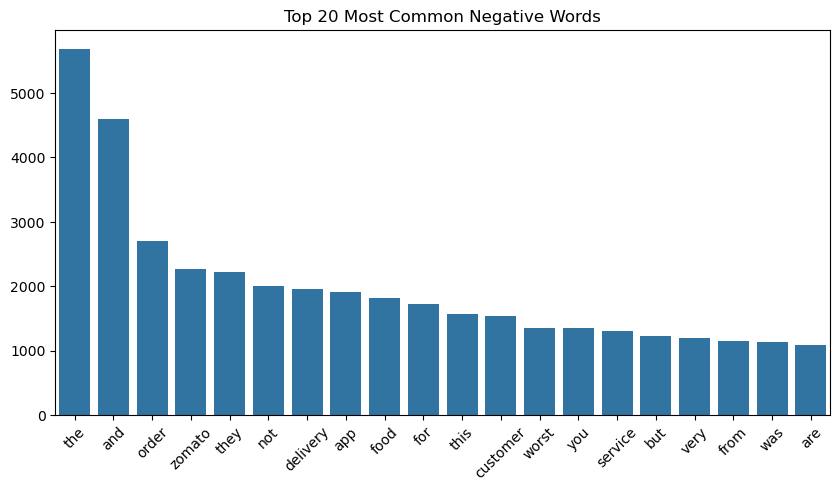

In [17]:
# ============================
# 📌 Common Negative Words
# ============================
negative_reviews = df[df["sentiment"] == 0]["review_text"]

# Tokenize
words = " ".join(negative_reviews).lower()
words = re.findall(r'\b[a-zA-Z]{3,}\b', words)

common_neg = Counter(words).most_common(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in common_neg], y=[w[1] for w in common_neg])
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Negative Words")
plt.show()


In [5]:
# ============================
# 📌 Train/Test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    df["review_text"],
    df["sentiment"],
    test_size=0.2,
    random_state=42
)


In [6]:
# ============================
# 📌 TF-IDF Vectorization
# ============================
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


In [7]:
# ============================
# 📌 Train Naive Bayes model
# ============================
nb = MultinomialNB()
nb.fit(X_train_tf, y_train)


MultinomialNB()

In [8]:
# ============================
# 📌 Predictions
# ============================
y_pred = nb.predict(X_test_tf)


In [9]:
# ============================
# 📌 Model Evaluation
# ============================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.92025
F1 Score: 0.9458863443596268

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1081
           1       0.94      0.96      0.95      2919

    accuracy                           0.92      4000
   macro avg       0.90      0.89      0.90      4000
weighted avg       0.92      0.92      0.92      4000



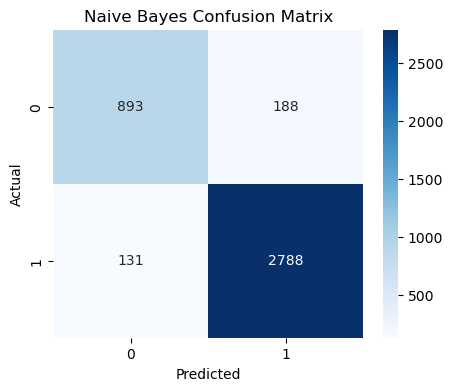

In [10]:
# ============================
# 📌 Confusion Matrix
# ============================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Machine Learning Model 2 — Support Vector Machine (SVM)

### Why SVM?
SVM is powerful for text classification because:
- It maximizes class separation using a hyperplane
- Works well with TF-IDF sparse data
- Often outperforms Naive Bayes

### Main Concept
SVM tries to find a hyperplane:

\[
w^T x + b = 0
\]

that maximizes the margin between positive and negative classes.


In [11]:
from sklearn.svm import LinearSVC

# ============================
# 📌 Train SVM model
# ============================
svm = LinearSVC()
svm.fit(X_train_tf, y_train)


LinearSVC()

In [12]:
# ============================
# 📌 Predictions
# ============================
y_pred_svm = svm.predict(X_test_tf)


In [13]:
# ============================
# 📌 Model Evaluation
# ============================
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.91825
F1 Score: 0.9443214711391111

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1081
           1       0.94      0.95      0.94      2919

    accuracy                           0.92      4000
   macro avg       0.90      0.89      0.90      4000
weighted avg       0.92      0.92      0.92      4000



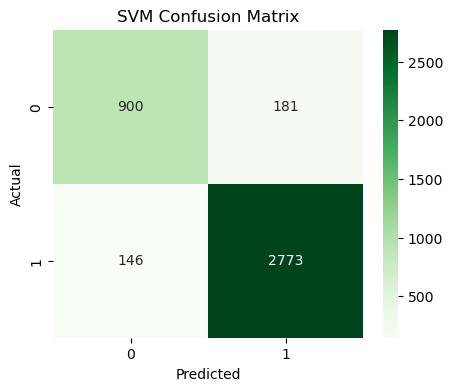

In [14]:
# ============================
# 📌 Confusion Matrix
# ============================
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
